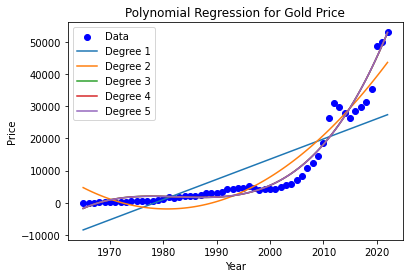

Best degree of polynomial: 5


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('gold_rate.csv')

# Split the data into independent (X) and dependent (Y) variables
X = data['Year'].values.reshape(-1, 1)
Y = data['Price (24 karat per 10 grams)'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Plot the original data points
plt.scatter(X, Y, color='blue', label='Data')

best_degree = None
best_mse = float('inf')

for degree in range(1, 6):  # Try degrees from 1 to 5
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    X_test_poly = poly_features.transform(X_test)
    predictions = model.predict(X_test_poly)
    
    mse = mean_squared_error(Y_test, predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_degree = degree
        
    # Plot the regression curve for the current degree
    X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    Y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, Y_plot, label=f'Degree {degree}')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Polynomial Regression for Gold Price')
plt.legend()
plt.show()

print(f"Best degree of polynomial: {best_degree}")


Accuracy: 1.0
Confusion Matrix:
[[ 9  0]
 [ 0 15]]


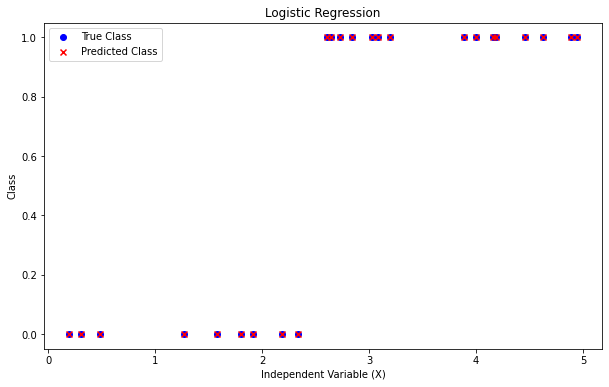

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate example data (replace this with your dataset)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
Y = (X > 2.5).astype(int).ravel()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='True Class')
plt.scatter(X_test, Y_pred, color='red', label='Predicted Class', marker='x')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Class')
plt.title('Logistic Regression')
plt.legend()
plt.show()


Mean Squared Error: 0.26901070187702053


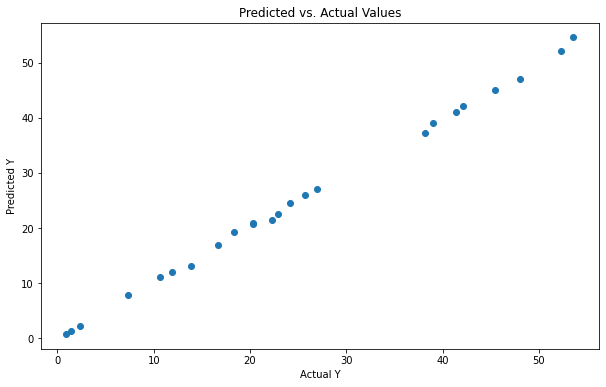

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate example data (replace this with your dataset)
np.random.seed(0)
X1 = np.sort(5 * np.random.rand(80, 1), axis=0)
X2 = np.sort(5 * np.random.rand(80, 1), axis=0)
Y = 2 * X1 + 1.5 * X2 + 1.5 * X1 * X2 + np.random.normal(0, 0.5, (80, 1))

# Combine X1 and X2 into a single feature matrix
X = np.hstack((X1, X2))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Set the degree for polynomial features
degree = 2  # You can change this to the desired degree

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_poly_train, Y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_poly_test)

# Calculate mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs. Actual Values')
plt.show()


Accuracy: 1.0
Confusion Matrix:
[[ 3  0]
 [ 0 21]]


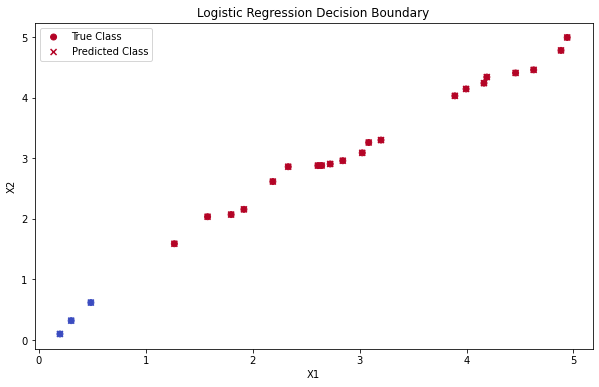

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate example data (replace this with your dataset)
np.random.seed(0)
X1 = np.sort(5 * np.random.rand(80, 1), axis=0)
X2 = np.sort(5 * np.random.rand(80, 1), axis=0)
X = np.hstack((X1, X2))
Y = (2 * X1 + 1.5 * X2 > 4).astype(int).ravel()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='coolwarm', marker='o', label='True Class')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap='coolwarm', marker='x', label='Predicted Class')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()
